# Data CLeaning

### data showing


In [345]:
import pandas as pd

In [346]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [347]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Decribing the data


In [349]:
df.describe()
# tells that the data range from 1980 to 2020

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### info of columns and there data types


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Finding and Removing Null values if any.


In [353]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Removing columns with very large number of missing values


In [355]:
df.drop(columns=['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'], inplace = True)

### removing rows with missing values


In [357]:
indexes = df[df.isnull().sum(axis = 1) > 0].index

In [358]:
df.drop(index=indexes, inplace = True)

In [359]:
# Now we have no null values


In [360]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

# Data Analysis and Visualization

## Data Exploration

###  Number of games


In [364]:
len(df['Name'])
# as there are no null entries so the number of names are number of games

16416

### Columns and types


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


##  Sales Trends

### global sales trend over time


In [369]:
# sorting data according to date from 1980 to 2020
df = df.sort_values(by=['Year_of_Release']).reset_index(drop=True)


In [370]:
yearly_sales = df.groupby(['Year_of_Release'])['Global_Sales'].sum()

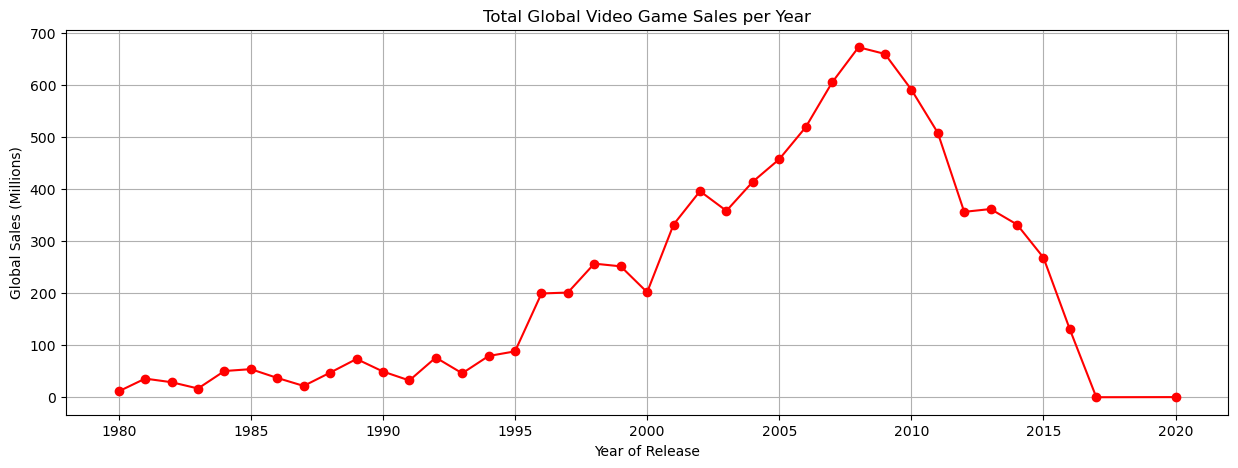

In [371]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'red', marker = 'o')
plt.title('Total Global Video Game Sales per Year')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (Millions)')
plt.grid(True)
plt.show()


## Top-Selling Games & Publishers

### top ten best selling games Globaly


In [521]:
top_publishers = df.sort_values(by=['Global_Sales'], ascending = False)['Name'].head(10)

In [523]:
top_publishers

6805                    Wii Sports
125              Super Mario Bros.
8626                Mario Kart Wii
10642            Wii Sports Resort
879       Pokemon Red/Pokemon Blue
199                         Tetris
6113         New Super Mario Bros.
6089                      Wii Play
10641    New Super Mario Bros. Wii
110                      Duck Hunt
Name: Name, dtype: object

### highest global sales publisher


In [377]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(1)

Publisher
Nintendo    1786.72
Name: Global_Sales, dtype: float64

### bar plot for top 10 games


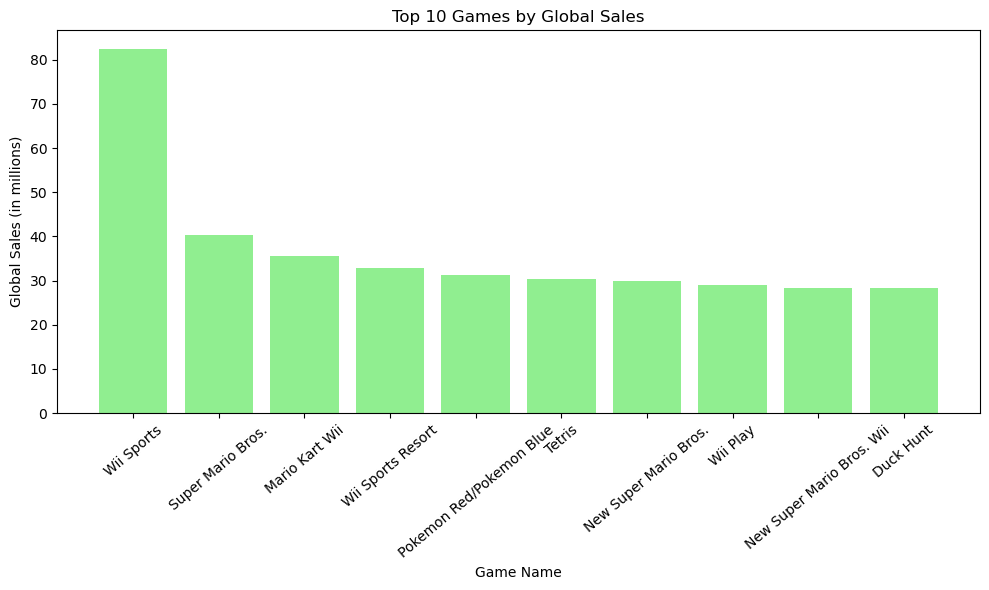

In [379]:
import matplotlib.pyplot as plt

# Get data
top10 = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top10['Name'], top10['Global_Sales'], color='lightgreen')

plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Games by Global Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


### bar plot for top 10 publisher


In [381]:
top10_publisher = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10_publisher

Publisher
Nintendo                        1786.72
Electronic Arts                 1100.05
Activision                       725.14
Sony Computer Entertainment      606.27
Ubisoft                          470.45
Take-Two Interactive             403.58
THQ                              338.11
Konami Digital Entertainment     277.36
Sega                             268.11
Namco Bandai Games               254.19
Name: Global_Sales, dtype: float64

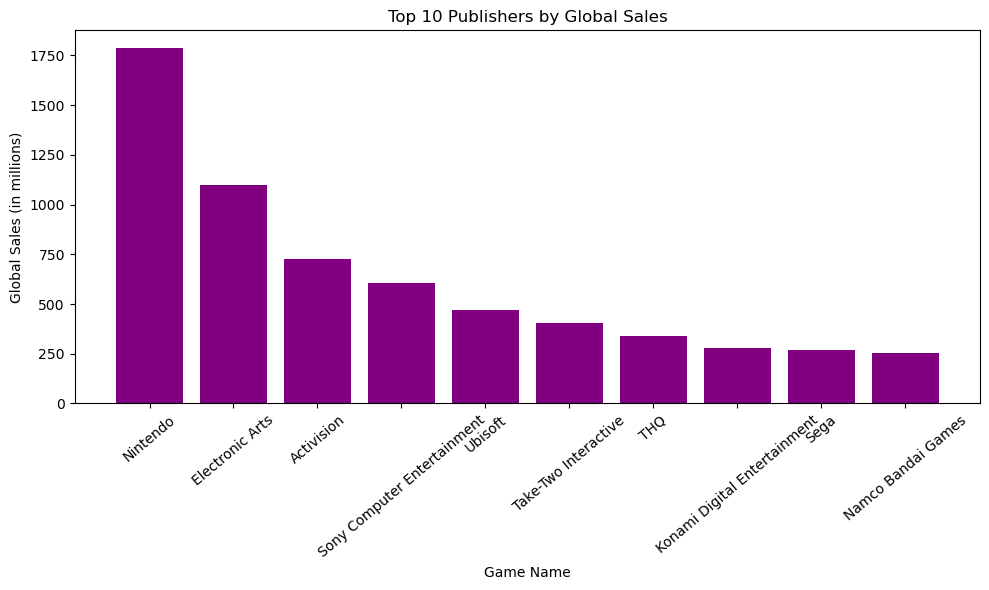

In [382]:
plt.figure(figsize=(10,6))
plt.bar(top10_publisher.index, top10_publisher.values, color='purple')

plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Publishers by Global Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


## Regional Popularity

### popular game in NA 


In [385]:
df.sort_values(by=['NA_Sales'], ascending = False)['Name'].head()

6805           Wii Sports
125     Super Mario Bros.
110             Duck Hunt
199                Tetris
8626       Mario Kart Wii
Name: Name, dtype: object

### popular games in EU


In [387]:
df.sort_values(by=['EU_Sales'], ascending = False)['Name'].head()

6805                                       Wii Sports
8626                                   Mario Kart Wii
5549                                       Nintendogs
10642                               Wii Sports Resort
5403     Brain Age: Train Your Brain in Minutes a Day
Name: Name, dtype: object

### popular games in JP


In [389]:
df.sort_values(by=['JP_Sales'], ascending = False)['Name'].head()

879          Pokemon Red/Pokemon Blue
1933      Pokemon Gold/Pokemon Silver
125                 Super Mario Bros.
6113            New Super Mario Bros.
6258    Pokemon Diamond/Pokemon Pearl
Name: Name, dtype: object

### top 5 global games reginol comparision of sales


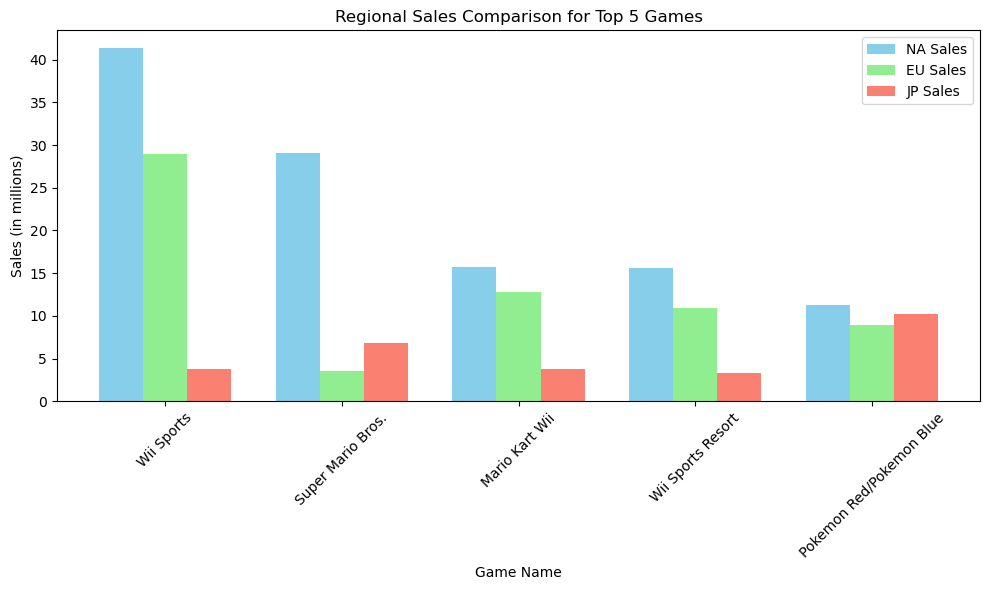

In [391]:
import numpy as np

# Select top 5 games
top5 = df.sort_values(by='Global_Sales', ascending=False).head(5)

# Define labels and values
labels = top5['Name']
na_sales = top5['NA_Sales']
eu_sales = top5['EU_Sales']
jp_sales = top5['JP_Sales']

# Set bar width and x positions
x = np.arange(len(labels))  # the label locations
width = 0.25  # width of the bars

# Plot
plt.figure(figsize=(10,6))
plt.bar(x - width, na_sales, width, label='NA Sales', color='skyblue')
plt.bar(x, eu_sales, width, label='EU Sales', color='lightgreen')
plt.bar(x + width, jp_sales, width, label='JP Sales', color='salmon')

# Labels and title
plt.xlabel('Game Name')
plt.ylabel('Sales (in millions)')
plt.title('Regional Sales Comparison for Top 5 Games')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### gnere which produce the most global sales


In [446]:
df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending = False).head(1)
# action with 1717.62 millions

Genre
Action    1717.62
Name: Global_Sales, dtype: float64

### Bar Chart of Global sales according to genre

In [459]:
genre = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending = False)

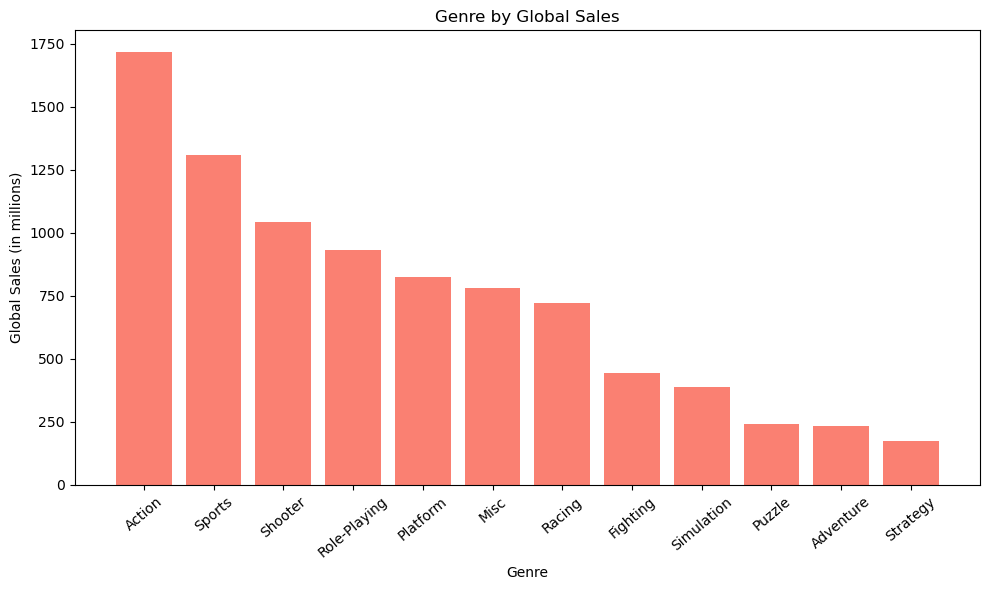

In [463]:
plt.figure(figsize=(10,6))
plt.bar(genre.index, genre.values, color='salmon')

plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Genre by Global Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

### Platorm Comparisons by Global sales

In [481]:
top_platforms = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending = False).head(10)

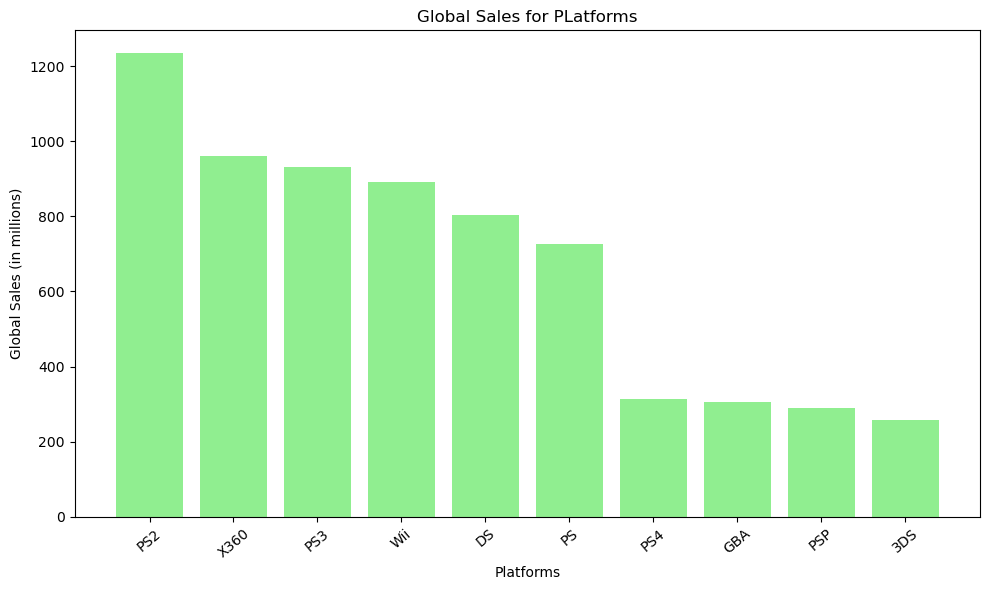

In [485]:
plt.figure(figsize=(10,6))
plt.bar(top_platforms.index, top_platforms.values, color='lightgreen')

plt.xlabel('Platforms')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales for PLatforms')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

### platform sales in country each


In [487]:
df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending = False).head(10)

Platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
DS      188.41
PS4     141.09
PC      140.08
GBA      72.49
PSP      65.62
Name: EU_Sales, dtype: float64

In [491]:
df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending = False).head(10)

Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
NES      98.65
GB       85.12
PS3      79.41
PSP      75.88
Wii      68.28
Name: JP_Sales, dtype: float64

In [493]:
df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending = False).head(10)

Platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.58
PS      334.72
XB      182.06
GBA     178.43
N64     138.91
GC      131.94
Name: NA_Sales, dtype: float64

## total sales per region


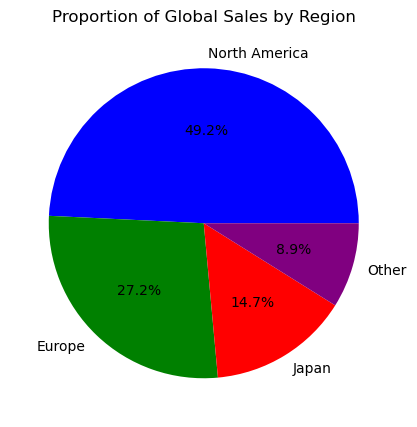

In [555]:
region_sales = [
    df['NA_Sales'].sum(),
    df['EU_Sales'].sum(),
    df['JP_Sales'].sum(),
    df['Other_Sales'].sum()
]

labels = ['North America', 'Europe', 'Japan', 'Other']
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(5, 10))
plt.pie(region_sales, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Global Sales by Region')
plt.show()
